In [0]:
# !pip install -q panel
# !pip install -q bokeh>=1.3.4
# !pip install -q holoviews>=1.12.7

In [0]:
import numpy as np
import panel as pn
import pandas as pd
import matplotlib
import bokeh
import holoviews as hv
from distutils.version import LooseVersion

In [0]:
min_versions = dict(pn='0.7.0', pd='0.24.0', matplotlib='2.1', bokeh='1.4.0', hv='1.12.3')

In [0]:
for lib, ver in min_versions.items():
    v = globals()[lib].__version__
    if LooseVersion(v) < LooseVersion(ver):
        print("Error: expected {}={}. got {}".format(lib, ver, v))

In [5]:
!rm -f datatest.txt
!wget https://gitlab.com/volodink/jupyter-course/-/raw/master/data/datatest.txt

--2020-05-27 08:57:44--  https://gitlab.com/volodink/jupyter-course/-/raw/master/data/datatest.txt
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘datatest.txt’

datatest.txt            [ <=>                ] 683.27K  --.-KB/s    in 0.05s   

2020-05-27 08:57:44 (12.4 MB/s) - ‘datatest.txt’ saved [699664]



In [6]:
data = pd.read_csv('datatest.txt')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

Temperature  Humidity  ...  HumidityRatio  Occupancy
date                                        ...                          
2015-02-18 09:15:00       20.815   27.7175  ...       0.004213          1
2015-02-18 09:16:00       20.865   27.7450  ...       0.004230          1
2015-02-18 09:16:59       20.890   27.7450  ...       0.004237          1
2015-02-18 09:17:59       20.890   28.0225  ...       0.004279          1
2015-02-18 09:19:00       21.000   28.1000  ...       0.004321          1

[5 rows x 6 columns]

In [0]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

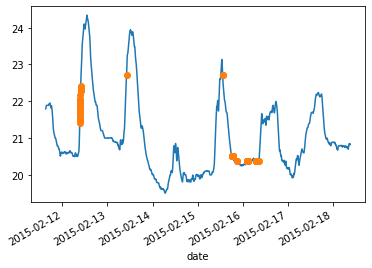

In [8]:
find_outliers(variable='Temperature', window=20, sigma=10)

In [9]:
import panel as pn
pn.extension()

app = pn.interact(find_outliers, variable=['Temperature', 'CO2', 'Occupancy'], window=(1,50), sigma=(1,50))
app.show()


Launching server at http://localhost:34063
